In [1]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# # Define a function to parse the text file and construct a DataFrame
# def parse_log_to_dataframe(file_path):
#     data = []
#     with open(file_path, 'r') as file:
#         epoch_data = {}
#         for line in file:
#             line = line.strip()
#             if line.startswith("Epoch") and "train errors" in line:
#                 if epoch_data:  # If epoch_data is not empty, save it
#                     data.append(epoch_data)
#                     epoch_data = {}
#                 epoch_data['Epoch'] = int(re.search(r"Epoch (\d+)", line).group(1))
#                 train_errors = eval(line.split(": ", 1)[1])
#                 for k, v in train_errors.items():
#                     epoch_data[f"Train_{k}"] = v
#             elif "validation errors" in line:
#                 validation_errors = eval(line.split(": ", 1)[1])
#                 for k, v in validation_errors.items():
#                     epoch_data[f"Validation_{k}"] = v
#             elif "test errors" in line:
#                 test_errors = eval(line.split(": ", 1)[1])
#                 for k, v in test_errors.items():
#                     epoch_data[f"Test_{k}"] = v
#             elif "current learning rate" in line:
#                 epoch_data['Learning_Rate'] = float(line.split("=")[-1].strip())
#         if epoch_data:  # Append the last epoch data
#             data.append(epoch_data)

#     # Create a DataFrame
#     df = pd.DataFrame(data)
#     return df

# # Specify the file path
# file_path = "output.txt"

# # Generate the DataFrame
# df = parse_log_to_dataframe(file_path)

# # Display the first few rows of the DataFrame
# print(df.head())

# # Save the DataFrame to a CSV file if needed
# df.to_csv("parsed_data.csv", index=False)


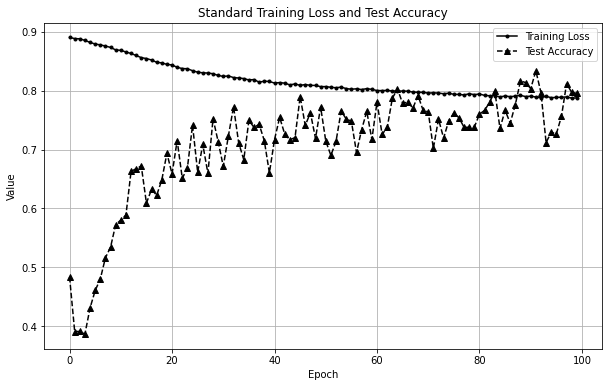

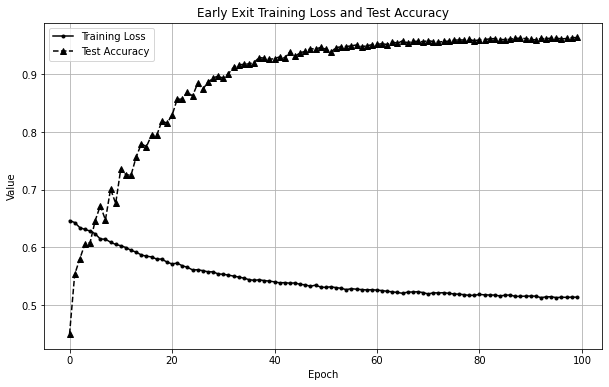

In [3]:
def plot_training_metrics(df, name):
    plt.figure(figsize=(10, 6))

    plt.plot(df['Epoch'], df['Train_Seg_Loss'], label='Training Loss', color='black', marker='.', linestyle='-')
    plt.plot(df['Epoch'], df['Test_Overall_Acc'], label='Test Accuracy', color='black', marker='^', linestyle='--')

    plt.title(f'{name} Training Loss and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{name}.png", dpi=300)  # Fixed typo from 'pls.savefig' to 'plt.savefig'
    plt.show()

# Load the data
df = pd.read_csv("parsed_data.csv")
df_ee = pd.read_csv("parsed_data_early_exit.csv")

# Call the function to plot
plot_training_metrics(df, "Standard")
plot_training_metrics(df_ee, "Early Exit")

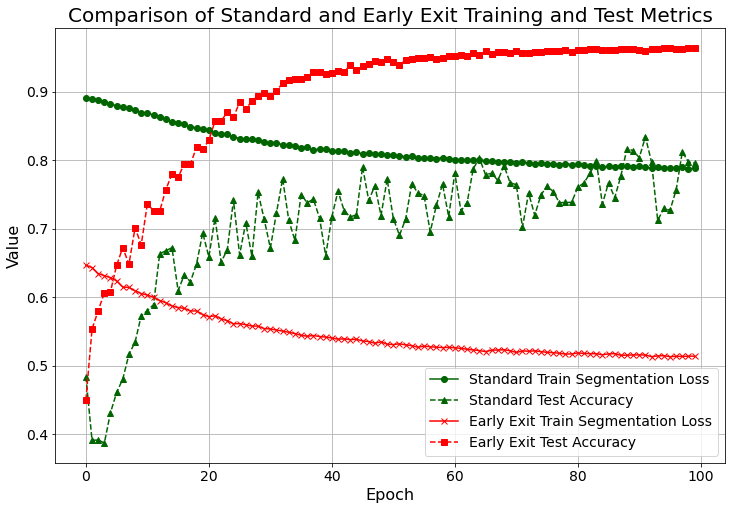

In [12]:
def plot_training_metrics(df1, df2, name1, name2):
    plt.figure(figsize=(12, 8))

    # Plot metrics for the first dataset
    plt.plot(df1['Epoch'], df1['Train_Seg_Loss'], label=f'{name1} Train Segmentation Loss', color='darkgreen', marker='o', linestyle='-')
    plt.plot(df1['Epoch'], df1['Test_Overall_Acc'], label=f'{name1} Test Accuracy', color='darkgreen', marker='^', linestyle='--')

    # Plot metrics for the second dataset
    plt.plot(df2['Epoch'], df2['Train_Seg_Loss'], label=f'{name2} Train Segmentation Loss', color='red', marker='x', linestyle='-')
    plt.plot(df2['Epoch'], df2['Test_Overall_Acc'], label=f'{name2} Test Accuracy', color='red', marker='s', linestyle='--')

    # Add title, labels, grid, and legend with larger text
    plt.title(f'Comparison of {name1} and {name2} Training and Test Metrics', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=14)

    # Increase tick size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Save and display the plot
    plt.savefig(f"Comparison_{name1}_vs_{name2}.png", dpi=300)
    plt.show()

# Load the data
df_standard = pd.read_csv("parsed_data.csv")
df_early_exit = pd.read_csv("parsed_data_early_exit.csv")

# Call the function to plot both runs on the same plot
plot_training_metrics(df_standard, df_early_exit, "Standard", "Early Exit")
